# Q: recz to improve cvr

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
import statsmodels.api as sms
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('conversion_project.csv')
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [8]:
df.shape

(316200, 6)

## EDA

In [65]:
df.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [7]:
df.describe(include='all')
# Missing valuesare automatically excluded from count, mean, std, min, etc.
# count shows the number of non-missing values.
# findings:
# no missing values 
# age has erros as max age is 123

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


<Axes: xlabel='age'>

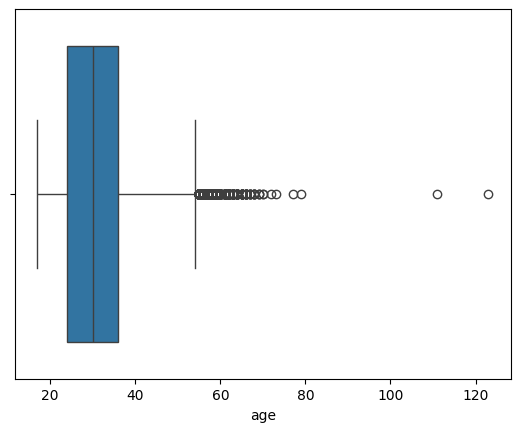

In [10]:
# look at age col
sns.boxplot(df, x='age')

In [13]:
# A boxplot applies the IQR rule to flag and visualize outliers.
# write a function to identify outliers:
def get_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    outliers = df[(df[col]<lower_bound)|(df[col]>upper_bound)]
    return outliers

In [20]:
outlier_age = get_outliers(df,'age').sort_values(by='age',ascending=False)

In [22]:
outlier_age.head(20)

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0
208969,US,72,1,Direct,4,0
114485,US,70,1,Ads,9,0
301366,UK,70,0,Ads,5,0
57122,UK,69,1,Direct,4,0
290142,US,69,1,Seo,6,0


In [18]:
outlier_age['converted'].value_counts()

converted
0    1540
1      10
Name: count, dtype: int64

In [23]:
outlier_age.query('converted==1') #needs to exclude top two rows

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
242085,US,61,0,Seo,9,1
165865,US,60,0,Ads,21,1
45718,US,60,1,Seo,9,1
240940,US,58,1,Seo,13,1
245868,UK,58,1,Seo,14,1
121466,US,55,1,Seo,16,1
234275,US,55,0,Seo,10,1
238937,US,55,0,Seo,16,1


In [26]:
outlier_page_visited = get_outliers(df,'total_pages_visited').sort_values(by='total_pages_visited',ascending=False)
outlier_page_visited.shape

(5663, 6)

In [27]:
outlier_page_visited.head(10)

,country,age,new_user,source,total_pages_visited,converted
302291,US,31,0,Ads,29,1
258074,US,33,0,Direct,29,1
90314,US,17,1,Direct,28,1
11167,US,24,0,Seo,27,1
105440,US,25,0,Ads,27,1
21665,UK,21,1,Direct,27,1
287990,Germany,22,1,Seo,27,1
67115,UK,17,1,Seo,27,1
73199,UK,27,0,Seo,27,1
253351,US,22,0,Ads,27,1


In [28]:
clean_df=df.query('age<100')
clean_df.shape

(316198, 6)

In [30]:
clean_df[['age','total_pages_visited']].corr() 

,age,total_pages_visited
age,1.000000,-0.046093
total_pages_visited,-0.046093,1.000000


In [32]:
clean_df['country'].value_counts()

country
US         178092
China       76602
UK          48449
Germany     13055
Name: count, dtype: int64

In [33]:
clean_df['source'].value_counts()

source
Seo       155039
Ads        88739
Direct     72420
Name: count, dtype: int64

In [34]:
clean_df['converted'].value_counts() # unbalanced class

converted
0    306000
1     10198
Name: count, dtype: int64

Text(0.5, 1.0, 'avg cvr by country & user type')

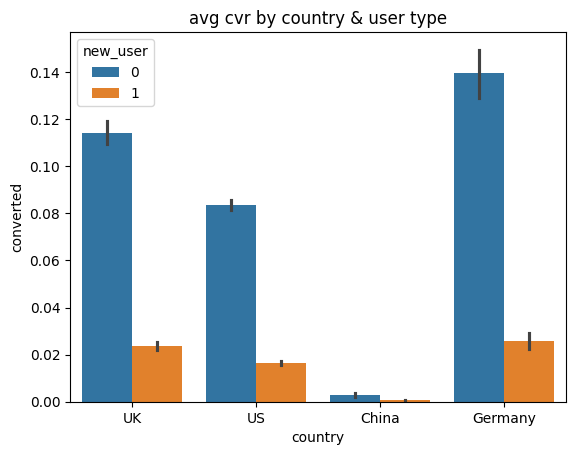

In [39]:
sns.barplot(clean_df, x='country',y='converted',hue ='new_user')
plt.title('avg cvr by country & user type')

Text(0.5, 1.0, 'avg cvr by source & user type')

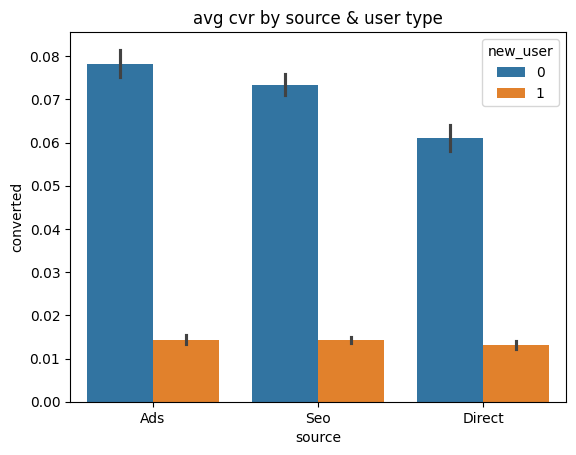

In [93]:
sns.barplot(clean_df, x='source',y='converted',hue ='new_user')
plt.title('avg cvr by source & user type')

Text(0.5, 1.0, 'cvr by age')

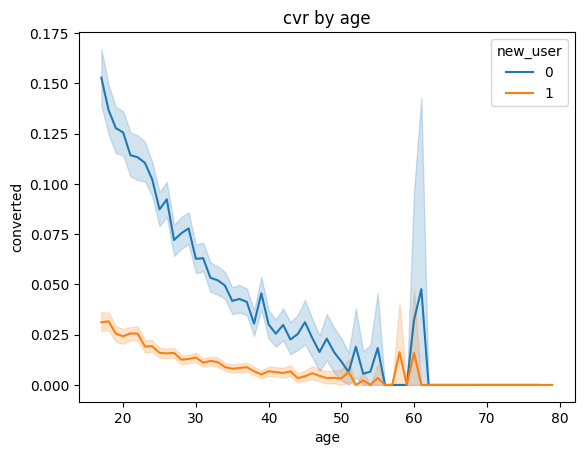

In [42]:
sns.lineplot(clean_df, x='age',y='converted',hue ='new_user')
plt.title('cvr by age & user type')

Text(0.5, 1.0, 'cvr by page visited & user type')

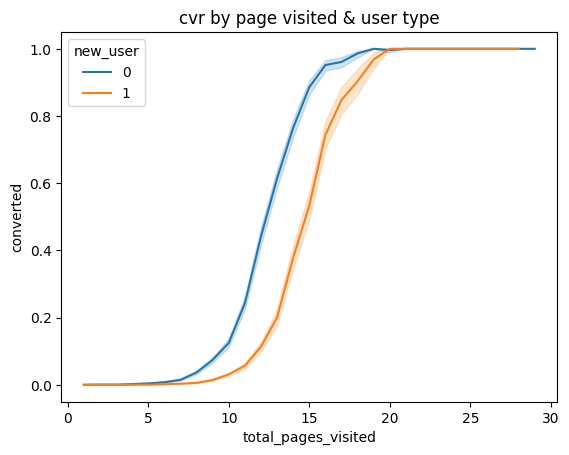

In [44]:
sns.lineplot(clean_df, x='total_pages_visited',y='converted',hue ='new_user')
plt.title('cvr by page visited & user type')

In [45]:
# EDA summary: old user more willing to purchase compared with old user

## build model

In [66]:
cat_cols = clean_df.select_dtypes(include='object').columns

In [67]:
reference_levels = {}

In [68]:
for col in cat_cols:
    reference_levels[col]=sorted(clean_df[col].unique())[0]

In [69]:
reference_levels

{'country': 'China', 'source': 'Ads'}

In [70]:
df_dummy = pd.get_dummies(clean_df, dtype=float, drop_first=True)

In [71]:
df_dummy.head()

,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,0.0,1.0,0.0,0.0,0.0
1,23,1,5,0,0.0,0.0,1.0,0.0,1.0
2,28,1,4,0,0.0,0.0,1.0,0.0,1.0
3,39,1,5,0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,1.0,0.0,1.0


In [72]:
df_dummy=sms.add_constant(df_dummy)

In [73]:
df_dummy.head()

,const,age,new_user,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,1.0,25,1,1,0,0.0,1.0,0.0,0.0,0.0
1,1.0,23,1,5,0,0.0,0.0,1.0,0.0,1.0
2,1.0,28,1,4,0,0.0,0.0,1.0,0.0,1.0
3,1.0,39,1,5,0,0.0,0.0,0.0,0.0,1.0
4,1.0,30,1,6,0,0.0,0.0,1.0,0.0,1.0


In [92]:
# no need to scale features for logistic since we use log odds
# TODO: explain why I pick logistic regression

In [131]:
y=df_dummy['converted']
X = df_dummy.drop(columns = ['converted'])

In [132]:
# Logit doesn't support class_weights, need to manually overwight minoriaty class
# y.map() is a fast, clean way to assign new values (like weights) to each class label.
weights = y.map({0: 1, 1:(len(y)-y.sum())/y.sum()})

In [138]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [139]:
lr = sms.GLM(y_train, X_train, family=sms.families.Binomial()).fit(weights = weights)

In [149]:
y_prob_train = lr.predict(X_train)
y_prob_train

105624    0.000428
55853     0.000002
150261    0.000537
226667    0.000021
206696    0.000018
            ...   
119880    0.002283
259179    0.001557
131933    0.001469
146868    0.000458
121959    0.000052
Length: 252958, dtype: float64

In [150]:
y_pred_train = [1 if i >0.5 else 0 for i in y_prob_train]

In [151]:
confusion_matrix(y_true=y_train, y_pred=y_pred_train)

array([[243835,    960],
       [  2559,   5604]])

In [158]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    244795
           1       0.85      0.69      0.76      8163

    accuracy                           0.99    252958
   macro avg       0.92      0.84      0.88    252958
weighted avg       0.99      0.99      0.99    252958



In [156]:
# use test set to validate
y_prob_test = lr.predict(X_test)
y_pred_test = [1 if i >0.5 else 0 for i in y_prob_test]
confusion_matrix(y_true=y_test, y_pred=y_pred_test)

array([[60983,   222],
       [  627,  1408]])

In [159]:
print(classification_report(y_test,y_pred_test)) # not bad

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61205
           1       0.86      0.69      0.77      2035

    accuracy                           0.99     63240
   macro avg       0.93      0.84      0.88     63240
weighted avg       0.99      0.99      0.99     63240



In [160]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:               252958
Model:                            GLM   Df Residuals:                   252949
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10276.
Date:                Sat, 07 Jun 2025   Deviance:                       20553.
Time:                        11:43:18   Pearson chi2:                 2.11e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1844
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -10.3160      0.167    -61.616      0.000     -10.644      -9.988
age                    -0.0744      0.003    -28.022      0.000      -0.080      -0.069
new_user               -1.7428      0.040    -43.804      0.000      -1.821      -1.665
total_pages_visited     0.7591      0.007    109.095      0.000       0.745       0.773
country_Germany         3.7763      0.147     25.693      0.000       3.488       4.064
country_UK              3.5819      0.134     26.777      0.000       3.320       3.844
country_US              3.2010      0.130     24.671      0.000       2.947       3.455
source_Direct          -0.1600      0.055     -2.935      0.003      -0.267      -0.053
source_Seo             -0.0011      0.045     -0.024      0.981      -0.088       0.086
=======================================================================================
"""

In [161]:
coef = lr.summary2().tables[1][['Coef.','P>|z|']]
coef

,Coef.,P>|z|
const,-10.315950,0.000000e+00
age,-0.074443,8.843220e-173
new_user,-1.742815,0.000000e+00
total_pages_visited,0.759084,0.000000e+00
country_Germany,3.776296,1.394667e-145
country_UK,3.581894,5.920039e-158
country_US,3.201039,2.182416e-134
source_Direct,-0.159960,3.336384e-03
source_Seo,-0.001075,9.807501e-01


In [162]:
coef.loc['const']

Coef.   -10.31595
P>|z|     0.00000
Name: const, dtype: float64

In [163]:
coef.index

Index(['const', 'age', 'new_user', 'total_pages_visited', 'country_Germany',
       'country_UK', 'country_US', 'source_Direct', 'source_Seo'],
      dtype='object')

In [164]:
# country has biggest impact - german, UK, US


In [167]:
# compute the change using the logistic (sigmoid) function. Take age as example
# log odds p0: logit(p0) = log(p0/(1-p0))
# new log odds = logit(p0)+beta
# prob p1 = /(1+exp(-new log odds))
P0 = clean_df['converted'].mean()
P0

np.float64(0.03225194340255157)

In [113]:
P1 = 1 / (1 + np.exp(-logit_P1))
print(f"Baseline cvr(%): {P0*100:.3f}, New cvr (%) after +1 year: {P1*100:.3f}, Relative % Change: {(P1 - P0)/P0*100:.3f}")

Baseline cvr(%): 3.225, New cvr (%) after +1 year: 3.002, Relative % Change: -6.925


In [170]:
def get_rel_change(baseline,coef_pvalue_df):
    print(f"Baseline cvr(%): {baseline*100:.3f}")
    logit_P0 = np.log(baseline / (1 - baseline))
    sub_df = coef_pvalue_df[(coef_pvalue_df['P>|z|']<0.05)&(coef_pvalue_df.index != 'const')]
    sub_df.sort_values(by=['Coef.'],ascending=False, inplace=True)
    features = list(sub_df.index)
    for feature in features:
        logit_P1 = logit_P0 + sub_df.loc[feature,'Coef.']
        P1 = 1 / (1 + np.exp(-logit_P1))
        print(f" New cvr (%) after +1 unit in {feature} is: {P1*100:.3f}, Relative % Change: {(P1 - baseline)/baseline*100:.3f}")
                
    return True
    
    

In [171]:
get_rel_change(P0,coef)

Baseline cvr(%): 3.225
 New cvr (%) after +1 unit in country_Germany is: 59.264, Relative % Change: 1737.542
 New cvr (%) after +1 unit in country_UK is: 54.500, Relative % Change: 1589.830
 New cvr (%) after +1 unit in country_US is: 45.008, Relative % Change: 1295.507
 New cvr (%) after +1 unit in total_pages_visited is: 6.646, Relative % Change: 106.079
 New cvr (%) after +1 unit in age is: 3.001, Relative % Change: -6.959
 New cvr (%) after +1 unit in source_Direct is: 2.762, Relative % Change: -14.374
 New cvr (%) after +1 unit in new_user is: 0.580, Relative % Change: -82.019


/var/folders/zq/hqq8b43s3fj4rb11sgc943bw0000gn/T/ipykernel_2709/3673506780.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df.sort_values(by=['Coef.'],ascending=False, inplace=True)


True